In [1]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import time

# Local imports.
from urbansurge import swmm_model, analysis_tools

In [2]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config_physical.yml"

In [3]:
# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-10-17 00:00:00
Start Time: 2020-11-16 23:55:00


In [4]:
# Silting depths.
storage_id = 21
silt_depths = list(np.round(np.linspace(0, 2, 3),2))
print(silt_depths)

# Overflow conduit.
overflow_link_id = 11

[0.0, 1.0, 2.0]


In [5]:
# List of output data frames.
output_df_list = []

# Initial values.
# Get storage depth.
Ds_init = swmm.get_storage_property(storage_id, 'MaxDepth')

# Get conduit offsets.
(in_offset_init, out_offset) = swmm.get_link_offsets(overflow_link_id)

# Get the storage invert elevation.
zi_init = swmm.get_storage_property(storage_id, 'Elev.')

# Run the simulation with different roughness settings.
for i, depth_value in enumerate(silt_depths):
   
    # Update the storage_depth.
    Ds = Ds_init - depth_value
    swmm.set_storage_property(storage_id, 'MaxDepth', Ds)
    
    # Update conduit offset.
    in_offset = in_offset_init - depth_value
    swmm.set_link_offsets(overflow_link_id, (in_offset, out_offset))
    
    # Update storage invert elevation.
    zi = zi_init + depth_value
    swmm.set_storage_property(storage_id, 'Elev.', zi)
    
    # Run the simulation.
    swmm.run_simulation()
    
    # OUTPUT TO DATA FRAME
    # ---------------------------------------------------------------------
    # Get the node depths.
    node_depth_df = swmm.get_node_depth()

    # Get node flooding.
    node_flood_df = swmm.get_node_flooding()
    
    # Get node inflow.
    node_total_inflow_df = swmm.get_node_total_inflow()

    # Get link flow.
    link_flow_df = swmm.get_link_flow()
    
    # Get link depth.
    link_depth_df = swmm.get_link_depth()
    
    # Get link velocity.
    link_velocity_df = swmm.get_link_velocity()

    # Get precipitation time series.
    prcp_df = swmm.get_rainfall_timeseries()

    # Join data frames.
    fault_df = node_depth_df.merge(node_flood_df, on='datetime')
    fault_df = fault_df.merge(node_total_inflow_df, on='datetime')
    fault_df = fault_df.merge(link_flow_df, on='datetime')
    fault_df = fault_df.merge(link_depth_df, on='datetime')
    fault_df = fault_df.merge(link_velocity_df, on='datetime')
    fault_df = fault_df.merge(prcp_df, on='datetime')

    # Add experiment name.
    fault_df['Experiment'] = f'E_{i}'
        
    # Add link roughness.
    fault_df[f'Storage_{storage_id}_depth'] = depth_value

    # Add to list.
    output_df_list.append(fault_df)

    # ---------------------------------------------------------------------
    
output_df = pd.concat(output_df_list)

Updated MaxDepth value to 4.0 for 21 in 21
Set Storage 21 MaxDepth to 4.0
Updated InOffset value to 3.0 for 11 in 11
Updated OutOffset value to 0.0 for 11 in 11
Set Link 11 offsets to (3.0, 0.0)
Updated Elev. value to 141.0 for 21 in 21
Set Storage 21 Elev. to 141.0
2020-10-17 00:00:01 , 0
2020-10-17 00:50:01 , 0
2020-10-17 01:40:01 , 0
2020-10-17 02:30:01 , 0
2020-10-17 03:20:01 , 0
2020-10-17 04:10:01 , 1
2020-10-17 05:00:01 , 1
2020-10-17 05:50:01 , 1
2020-10-17 06:40:01 , 1
2020-10-17 07:30:01 , 1
2020-10-17 08:20:01 , 1
2020-10-17 09:10:01 , 1
2020-10-17 10:00:01 , 1
2020-10-17 10:50:01 , 1
2020-10-17 11:40:01 , 2
2020-10-17 12:30:01 , 2
2020-10-17 13:20:01 , 2
2020-10-17 14:10:01 , 2
2020-10-17 15:00:01 , 2
2020-10-17 15:50:01 , 2
2020-10-17 16:40:01 , 2
2020-10-17 17:30:01 , 2
2020-10-17 18:20:01 , 2
2020-10-17 19:10:01 , 3
2020-10-17 20:00:01 , 3
2020-10-17 20:50:01 , 3
2020-10-17 21:40:01 , 3
2020-10-17 22:30:01 , 3
2020-10-17 23:20:01 , 3
2020-10-18 00:10:01 , 3
2020-10-18 01

2020-10-30 07:46:45 , 43
2020-10-30 08:36:45 , 43
2020-10-30 09:26:45 , 43
2020-10-30 10:16:45 , 43
2020-10-30 11:06:31 , 43
2020-10-30 11:53:01 , 44
2020-10-30 12:37:08 , 44
2020-10-30 13:20:16 , 44
2020-10-30 14:03:58 , 44
2020-10-30 14:47:52 , 44
2020-10-30 15:33:13 , 44
2020-10-30 16:19:19 , 44
2020-10-30 17:04:07 , 44
2020-10-30 17:49:44 , 44
2020-10-30 18:36:09 , 44
2020-10-30 19:23:36 , 45
2020-10-30 20:11:24 , 45
2020-10-30 20:56:14 , 45
2020-10-30 21:39:39 , 45
2020-10-30 22:23:22 , 45
2020-10-30 23:06:00 , 45
2020-10-30 23:48:32 , 45
2020-10-31 00:31:04 , 45
2020-10-31 01:15:56 , 45
2020-10-31 02:04:04 , 45
2020-10-31 02:54:04 , 46
2020-10-31 03:44:04 , 46
2020-10-31 04:34:04 , 46
2020-10-31 05:24:04 , 46
2020-10-31 06:14:04 , 46
2020-10-31 07:04:04 , 46
2020-10-31 07:54:04 , 46
2020-10-31 08:44:04 , 46
2020-10-31 09:34:04 , 46
2020-10-31 10:24:04 , 47
2020-10-31 11:14:04 , 47
2020-10-31 12:04:04 , 47
2020-10-31 12:54:04 , 47
2020-10-31 13:44:04 , 47
2020-10-31 14:34:04 , 47


2020-11-12 18:49:14 , 86
2020-11-12 19:39:14 , 87
2020-11-12 20:29:14 , 87
2020-11-12 21:19:14 , 87
2020-11-12 22:09:14 , 87
2020-11-12 22:59:14 , 87
2020-11-12 23:49:14 , 87
2020-11-13 00:39:14 , 87
2020-11-13 01:29:14 , 87
2020-11-13 02:19:14 , 87
2020-11-13 03:09:14 , 88
2020-11-13 03:59:14 , 88
2020-11-13 04:49:14 , 88
2020-11-13 05:39:14 , 88
2020-11-13 06:29:14 , 88
2020-11-13 07:19:14 , 88
2020-11-13 08:09:14 , 88
2020-11-13 08:59:14 , 88
2020-11-13 09:49:14 , 88
2020-11-13 10:39:14 , 89
2020-11-13 11:29:14 , 89
2020-11-13 12:19:14 , 89
2020-11-13 13:09:14 , 89
2020-11-13 13:59:14 , 89
2020-11-13 14:49:14 , 89
2020-11-13 15:39:14 , 89
2020-11-13 16:29:14 , 89
2020-11-13 17:19:14 , 89
2020-11-13 18:09:14 , 90
2020-11-13 18:59:14 , 90
2020-11-13 19:49:14 , 90
2020-11-13 20:39:14 , 90
2020-11-13 21:29:14 , 90
2020-11-13 22:19:14 , 90
2020-11-13 23:09:14 , 90
2020-11-13 23:59:14 , 90
2020-11-14 00:49:14 , 90
2020-11-14 01:39:14 , 91
2020-11-14 02:29:14 , 91
2020-11-14 03:19:14 , 91


2020-10-27 01:24:53 , 32
2020-10-27 02:14:53 , 33
2020-10-27 03:04:53 , 33
2020-10-27 03:54:53 , 33
2020-10-27 04:44:53 , 33
2020-10-27 05:34:53 , 33
2020-10-27 06:24:53 , 33
2020-10-27 07:14:53 , 33
2020-10-27 08:04:53 , 33
2020-10-27 08:54:53 , 33
2020-10-27 09:44:53 , 34
2020-10-27 10:34:53 , 34
2020-10-27 11:24:53 , 34
2020-10-27 12:14:53 , 34
2020-10-27 13:04:53 , 34
2020-10-27 13:54:53 , 34
2020-10-27 14:44:53 , 34
2020-10-27 15:34:53 , 34
2020-10-27 16:24:53 , 34
2020-10-27 17:14:53 , 35
2020-10-27 18:04:53 , 35
2020-10-27 18:54:53 , 35
2020-10-27 19:44:53 , 35
2020-10-27 20:34:53 , 35
2020-10-27 21:24:53 , 35
2020-10-27 22:14:53 , 35
2020-10-27 23:04:53 , 35
2020-10-27 23:54:53 , 35
2020-10-28 00:44:53 , 36
2020-10-28 01:34:53 , 36
2020-10-28 02:24:53 , 36
2020-10-28 03:14:53 , 36
2020-10-28 04:04:53 , 36
2020-10-28 04:54:53 , 36
2020-10-28 05:44:53 , 36
2020-10-28 06:34:53 , 36
2020-10-28 07:24:53 , 36
2020-10-28 08:14:53 , 37
2020-10-28 09:04:53 , 37
2020-10-28 09:54:53 , 37


2020-11-08 00:33:22 , 71
2020-11-08 01:23:22 , 71
2020-11-08 02:13:22 , 71
2020-11-08 03:03:22 , 71
2020-11-08 03:53:22 , 71
2020-11-08 04:43:22 , 72
2020-11-08 05:33:22 , 72
2020-11-08 06:23:22 , 72
2020-11-08 07:13:22 , 72
2020-11-08 08:03:22 , 72
2020-11-08 08:53:22 , 72
2020-11-08 09:43:22 , 72
2020-11-08 10:33:22 , 72
2020-11-08 11:23:22 , 73
2020-11-08 12:13:22 , 73
2020-11-08 13:03:22 , 73
2020-11-08 13:53:22 , 73
2020-11-08 14:43:22 , 73
2020-11-08 15:33:22 , 73
2020-11-08 16:23:22 , 73
2020-11-08 17:13:22 , 73
2020-11-08 18:03:22 , 73
2020-11-08 18:53:22 , 74
2020-11-08 19:43:22 , 74
2020-11-08 20:33:22 , 74
2020-11-08 21:23:22 , 74
2020-11-08 22:13:22 , 74
2020-11-08 23:03:22 , 74
2020-11-08 23:53:22 , 74
2020-11-09 00:43:22 , 74
2020-11-09 01:33:22 , 74
2020-11-09 02:23:22 , 75
2020-11-09 03:13:22 , 75
2020-11-09 04:03:22 , 75
2020-11-09 04:53:22 , 75
2020-11-09 05:43:22 , 75
2020-11-09 06:33:22 , 75
2020-11-09 07:23:22 , 75
2020-11-09 08:13:22 , 75
2020-11-09 09:03:22 , 75


2020-10-22 20:33:07 , 19
2020-10-22 21:23:07 , 19
2020-10-22 22:13:07 , 19
2020-10-22 23:03:07 , 19
2020-10-22 23:53:07 , 19
2020-10-23 00:43:07 , 19
2020-10-23 01:33:07 , 20
2020-10-23 02:23:07 , 20
2020-10-23 03:13:07 , 20
2020-10-23 04:03:07 , 20
2020-10-23 04:53:07 , 20
2020-10-23 05:43:07 , 20
2020-10-23 06:33:07 , 20
2020-10-23 07:23:07 , 20
2020-10-23 08:13:07 , 20
2020-10-23 09:03:07 , 21
2020-10-23 09:53:07 , 21
2020-10-23 10:43:07 , 21
2020-10-23 11:33:07 , 21
2020-10-23 12:23:07 , 21
2020-10-23 13:13:07 , 21
2020-10-23 14:03:07 , 21
2020-10-23 14:53:07 , 21
2020-10-23 15:43:07 , 21
2020-10-23 16:33:07 , 22
2020-10-23 17:23:07 , 22
2020-10-23 18:13:07 , 22
2020-10-23 19:03:07 , 22
2020-10-23 19:53:07 , 22
2020-10-23 20:43:04 , 22
2020-10-23 21:32:45 , 22
2020-10-23 22:22:25 , 22
2020-10-23 23:12:25 , 22
2020-10-24 00:02:25 , 23
2020-10-24 00:52:25 , 23
2020-10-24 01:42:25 , 23
2020-10-24 02:32:25 , 23
2020-10-24 03:22:25 , 23
2020-10-24 04:12:25 , 23
2020-10-24 05:02:25 , 23


2020-11-03 21:17:05 , 58
2020-11-03 22:07:05 , 58
2020-11-03 22:57:05 , 58
2020-11-03 23:47:05 , 58
2020-11-04 00:37:05 , 58
2020-11-04 01:27:05 , 58
2020-11-04 02:17:05 , 58
2020-11-04 03:07:05 , 58
2020-11-04 03:57:05 , 59
2020-11-04 04:47:05 , 59
2020-11-04 05:37:05 , 59
2020-11-04 06:27:05 , 59
2020-11-04 07:17:05 , 59
2020-11-04 08:07:05 , 59
2020-11-04 08:57:05 , 59
2020-11-04 09:47:05 , 59
2020-11-04 10:37:05 , 59
2020-11-04 11:27:05 , 60
2020-11-04 12:17:05 , 60
2020-11-04 13:07:05 , 60
2020-11-04 13:57:05 , 60
2020-11-04 14:47:05 , 60
2020-11-04 15:37:05 , 60
2020-11-04 16:27:05 , 60
2020-11-04 17:17:05 , 60
2020-11-04 18:07:05 , 61
2020-11-04 18:57:05 , 61
2020-11-04 19:47:05 , 61
2020-11-04 20:37:05 , 61
2020-11-04 21:27:05 , 61
2020-11-04 22:17:05 , 61
2020-11-04 23:07:05 , 61
2020-11-04 23:57:05 , 61
2020-11-05 00:47:05 , 61
2020-11-05 01:37:05 , 62
2020-11-05 02:27:05 , 62
2020-11-05 03:17:05 , 62
2020-11-05 04:07:05 , 62
2020-11-05 04:57:05 , 62
2020-11-05 05:47:05 , 62


2020-11-16 00:07:05 , 97
2020-11-16 00:57:05 , 97
2020-11-16 01:47:05 , 97
2020-11-16 02:37:05 , 97
2020-11-16 03:27:05 , 97
2020-11-16 04:17:05 , 97
2020-11-16 05:07:05 , 97
2020-11-16 05:57:05 , 98
2020-11-16 06:47:05 , 98
2020-11-16 07:37:05 , 98
2020-11-16 08:27:05 , 98
2020-11-16 09:17:05 , 98
2020-11-16 10:07:05 , 98
2020-11-16 10:57:05 , 98
2020-11-16 11:47:05 , 98
2020-11-16 12:37:05 , 98
2020-11-16 13:27:05 , 99
2020-11-16 14:17:05 , 99
2020-11-16 15:07:05 , 99
2020-11-16 15:57:05 , 99
2020-11-16 16:47:05 , 99
2020-11-16 17:37:05 , 99
2020-11-16 18:27:05 , 99
2020-11-16 19:17:05 , 99
2020-11-16 20:07:05 , 99
2020-11-16 20:57:05 , 100
2020-11-16 21:47:05 , 100
2020-11-16 22:37:05 , 100
2020-11-16 23:27:05 , 100


In [6]:
output_df.columns

Index(['Depth_node_15', 'Depth_node_16', 'Depth_node_18', 'Depth_node_19',
       'Depth_node_20', 'Depth_node_12', 'Depth_node_13', 'Depth_node_14',
       'Depth_node_17', 'Depth_node_21', 'datetime', 'Flood_node_15',
       'Flood_node_16', 'Flood_node_18', 'Flood_node_19', 'Flood_node_20',
       'Flood_node_12', 'Flood_node_13', 'Flood_node_14', 'Flood_node_17',
       'Flood_node_21', 'Total_Inflow_node_15', 'Total_Inflow_node_16',
       'Total_Inflow_node_18', 'Total_Inflow_node_19', 'Total_Inflow_node_20',
       'Total_Inflow_node_12', 'Total_Inflow_node_13', 'Total_Inflow_node_14',
       'Total_Inflow_node_17', 'Total_Inflow_node_21', 'Flow_link_1',
       'Flow_link_2', 'Flow_link_5', 'Flow_link_6', 'Flow_link_7',
       'Flow_link_8', 'Flow_link_9', 'Flow_link_10', 'Flow_link_11',
       'Depth_link_1', 'Depth_link_2', 'Depth_link_5', 'Depth_link_6',
       'Depth_link_7', 'Depth_link_8', 'Depth_link_9', 'Depth_link_10',
       'Depth_link_11', 'Velocity_link_1', 'Velocit

C:\Users\ay434\AppData\Local\Temp\ipykernel_16684\749952076.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\ay434\AppData\Local\Temp\ipykernel_16684\749952076.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\ay434\AppData\Local\Temp\ipykernel_16684\749952076.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


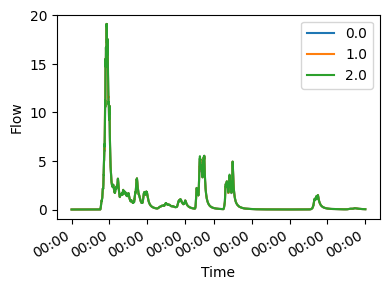

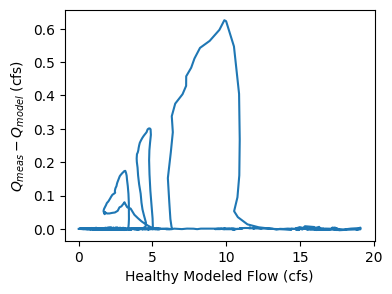

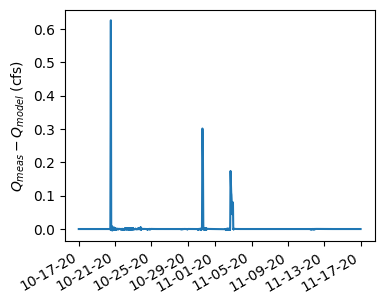

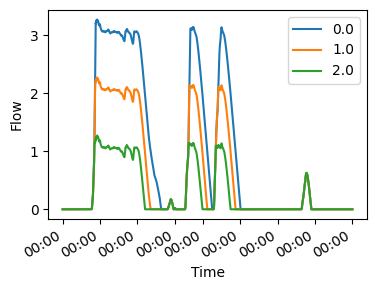

In [32]:
# Plot the output for a certain link.
plot_link_id = 10
plot_node_id = 21

# Flow time series.
fig, ax = plt.subplots(figsize=(4,3))
for i, depth in enumerate(silt_depths):
    plot_df = output_df.loc[output_df[f'Storage_{storage_id}_depth'] == depth, :]
    ax.plot(plot_df['datetime'], plot_df[f'Flow_link_{plot_link_id}'], label=depth)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Flow')
fig.tight_layout()
# fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\rough_L{}_flow.png".format(plot_link_id),
#             dpi=300)

# Plot flow time series against each other.
fig, ax = plt.subplots(figsize=(4,3))
plot_df_nosilt = output_df.loc[output_df[f'Storage_{storage_id}_depth'] == 0.0, :]
plot_df_silt = output_df.loc[output_df[f'Storage_{storage_id}_depth'] == 1.0, :]
ax.plot(plot_df_nosilt[f'Flow_link_{plot_link_id}'], 
           plot_df_silt[f'Flow_link_{plot_link_id}'] - plot_df_nosilt[f'Flow_link_{plot_link_id}'])
ax.set_xlabel('Healthy Modeled Flow (cfs)')
ax.set_ylabel('$Q_{meas} - Q_{model}$ (cfs)')

# Residual time series.
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(plot_df_nosilt['datetime'], plot_df_silt[f'Flow_link_{plot_link_id}'] - plot_df_nosilt[f'Flow_link_{plot_link_id}'])
ax.set_ylabel('$Q_{meas} - Q_{model}$ (cfs)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


# Node time series.
fig, ax = plt.subplots(figsize=(4,3))
for i, depth in enumerate(silt_depths):
    plot_df = output_df.loc[output_df[f'Storage_{storage_id}_depth'] == depth, :]
    ax.plot(plot_df['datetime'], plot_df[f'Depth_node_{plot_node_id}'], label=depth)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Flow')
fig.tight_layout()
# fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\rough_L{}_flow.png".format(plot_link_id),
#             dpi=300)